## Contents<a id='Contents'></a>
* [Data wrangling](#Data_wrangling)
  * [Contents](#Contents)
  * [Introduction](#Introduction)
    * [Recap Of Data Science Problem](#Recap_Of_Data_Science_Problem)
    * [Data Source](#data_source)
    * [API_request](#api_request)
    * [Load the Data](#load_data)
    * [saving pandas dataframe to parquet file](#df_2_parquet)
    * [About Columns in this dataset](#about_columns)
    
  * [Imports](#Imports)
  * [Objectives](#Objectives)
  * [Load The Crime reports Data](#load_data)
  * [Date Column Manipulations](#date_manipulations)
  * [Number of missing values by column](#missing_columns)
  * [ Check for Duplicates](#check_duplicates)
  * [save the wrangled file](#save_file)
  * [Summary of Data Wrangling](#summary)
     

### Introduction<a id='Introduction'>
    
This step focuses on collecting the data, organizing it, and making sure it's well defined. Some data cleaning will be done at this stage.

### Recap Of Data Science Problem<a id='Recap_Of_Data_Science_Problem'>
    
The purpose of this data science project is to come up with machine learning models that will provide guidance to Austin Police Department(APD) and provide safety measures to Austin Public by informing them about the safe negihborhoods.


### Data Source<a id='data_source'>
    
Data is provided by APD and dataset owner is APD PIO(Public Information Officer). 

### IMPORTS<a id='Imports'>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import time
from sodapy import Socrata
#requires conda installation of missingno
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os

from dotenv import load_dotenv
load_dotenv()
app_token=os.getenv('AUSTEX_API_TOKEN')

#print(app_token)



### API request<a id='api_request'>

In [3]:
x = requests.get(f"https://data.austintexas.gov/resource/fdj4-gpfu.json?$limit=2000000&$$app_token={app_token}")

In [4]:
print(x.status_code)

200


### Load the Data<a id='load_data'>

In [5]:
df=pd.DataFrame(data=x.json())

### Saving pandas dataframe to parquet file<a id='df_2_parquet'>

In [6]:
import pyarrow as pa
import pyarrow.parquet as pq

In [7]:
table = pa.Table.from_pandas(df, preserve_index=True)
pq.write_table(table, 'crime_reports.parquet')

In [8]:
df_parquet = pd.read_parquet('crime_reports.parquet')

In [9]:
df_parquet.head()

,incident_report_number,crime_type,ucr_code,family_violence,occ_date_time,occ_date,occ_time,rep_date_time,rep_date,rep_time,...,:@computed_region_a3it_2a2z,:@computed_region_8spj_utxs,:@computed_region_q9nd_rr82,:@computed_region_qwte_z96m,:@computed_region_e9j2_6w3z,:@computed_region_5gse_m7ik,clearance_status,clearance_date,ucr_category,category_description
0,2023491535,ASSAULT BY CONTACT FAM/DATING,902,Y,2023-02-18T23:55:00.000,2023-02-18T00:00:00.000,2355,2023-02-18T23:55:00.000,2023-02-18T00:00:00.000,2355,...,3641,4,9,1114,78,2,None,None,None,None
1,2023491436,POSS CONTROLLED SUB/NARCOTIC,1800,N,2023-02-18T23:27:00.000,2023-02-18T00:00:00.000,2327,2023-02-18T23:27:00.000,2023-02-18T00:00:00.000,2327,...,3640,9,10,1081,68,6,C,2023-02-19T00:00:00.000,None,None
2,2023491425,THEFT,600,N,2023-02-18T23:24:00.000,2023-02-18T00:00:00.000,2324,2023-02-18T23:24:00.000,2023-02-18T00:00:00.000,2324,...,2865,9,10,1169,36,6,None,None,23H,Theft
3,2023491475,TERRORISTIC THREAT,2704,N,2023-02-18T23:04:00.000,2023-02-18T00:00:00.000,2304,2023-02-18T23:04:00.000,2023-02-18T00:00:00.000,2304,...,3641,4,9,202,43,2,None,None,None,None
4,2023491472,DOC DISCHARGE GUN - PUB PLACE,2408,N,2023-02-18T23:03:00.000,2023-02-18T00:00:00.000,2303,2023-02-18T23:48:00.000,2023-02-18T00:00:00.000,2348,...,3256,3,3,None,46,1,None,None,None,None


### About Columns in this dataset <a id='about_columns'>

Incident_report_number: Incident Number<br>
Crime_type: Highest Offense Description<br>
Ucr_code: Highest Offense Code<br>
Family_violence: Incident involves family violence? Y = yes, N = no<br>
Occ_date_time: Date and Time(combined)  the incident occurred<br>
Occ_date:Date the incident occurred<br>
Occ_time: Time the incident occurred<br>
Rep_date_time: Date and time (combined) incident was reported<br>
Rep_date: Date the incident was reported<br>
Rep_time: Time the incident was reported<br>
Location_type: General description of the premise where the incident occurred<br>
Address: Incident location<br>
Zip_code: zip code where incident occurred<br>
Council_district: Austin city council district where incident occurred<br>
Sector: APD sector where incident occurred<br>
District: APD district where incident occurred<br>
Pra: APD police reporting area where incident occurred<br>
Census_tract: Census tract where incident occurred<br>
X_coordinate: X-coordinate where the incident occurred<br>
Y_coordinate: Y-coordinate where the incident occurred<br>
Latitude: Latitude where incident occurred<br>
Longitude: Longitude where incident occurred<br>
Location: 3rd party generated spatial column (not from source)<br>
Clearance_status: How/whether crime was solved (see lookup)<br>
Clearance_date: Date crime was solved<br>
Ucr_category: Code for the most serious crimes identified by the FBI as part of its Uniform Crime Reporting program<br>
Category_description: Description for the most serious crimes identified by the FBI as part of its Uniform Crime Reporting program<br>


In [10]:
df_parquet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000000 entries, 0 to 1999999
Data columns (total 33 columns):
 #   Column                       Dtype 
---  ------                       ----- 
 0   incident_report_number       object
 1   crime_type                   object
 2   ucr_code                     object
 3   family_violence              object
 4   occ_date_time                object
 5   occ_date                     object
 6   occ_time                     object
 7   rep_date_time                object
 8   rep_date                     object
 9   rep_time                     object
 10  location_type                object
 11  address                      object
 12  zip_code                     object
 13  council_district             object
 14  sector                       object
 15  district                     object
 16  pra                          object
 17  census_tract                 object
 18  x_coordinate                 object
 19  y_coordinate         

I notice six columns which are generated based on zipcode and zoning. I do not require it. so dropping thhose columns. 

In [11]:
#out of 33 columns, removing the below 6. keeping 27 for now
drop_columns = [':@computed_region_a3it_2a2z',':@computed_region_8spj_utxs',':@computed_region_q9nd_rr82',':@computed_region_e9j2_6w3z',':@computed_region_5gse_m7ik',':@computed_region_qwte_z96m']
df_27 = df_parquet.drop(drop_columns, axis=1)

In [12]:
df_27.columns

Index(['incident_report_number', 'crime_type', 'ucr_code', 'family_violence',
       'occ_date_time', 'occ_date', 'occ_time', 'rep_date_time', 'rep_date',
       'rep_time', 'location_type', 'address', 'zip_code', 'council_district',
       'sector', 'district', 'pra', 'census_tract', 'x_coordinate',
       'y_coordinate', 'latitude', 'longitude', 'location', 'clearance_status',
       'clearance_date', 'ucr_category', 'category_description'],
      dtype='object')

In [13]:
df_27.shape

(2000000, 27)

In [14]:
df_27.dtypes

incident_report_number    object
crime_type                object
ucr_code                  object
family_violence           object
occ_date_time             object
occ_date                  object
occ_time                  object
rep_date_time             object
rep_date                  object
rep_time                  object
location_type             object
address                   object
zip_code                  object
council_district          object
sector                    object
district                  object
pra                       object
census_tract              object
x_coordinate              object
y_coordinate              object
latitude                  object
longitude                 object
location                  object
clearance_status          object
clearance_date            object
ucr_category              object
category_description      object
dtype: object

In [15]:
# need to convert datetime columns from object data type to date types
df_27['occurred_date_time'] = pd.to_datetime(df_27['occ_date_time'],format='%Y-%m-%d')

In [16]:
df_27['reported_date_time'] = pd.to_datetime(df_27['rep_date_time'],format='%Y-%m-%d')

In [17]:
df_27.columns

Index(['incident_report_number', 'crime_type', 'ucr_code', 'family_violence',
       'occ_date_time', 'occ_date', 'occ_time', 'rep_date_time', 'rep_date',
       'rep_time', 'location_type', 'address', 'zip_code', 'council_district',
       'sector', 'district', 'pra', 'census_tract', 'x_coordinate',
       'y_coordinate', 'latitude', 'longitude', 'location', 'clearance_status',
       'clearance_date', 'ucr_category', 'category_description',
       'occurred_date_time', 'reported_date_time'],
      dtype='object')

In [18]:
df_27.head()

,incident_report_number,crime_type,ucr_code,family_violence,occ_date_time,occ_date,occ_time,rep_date_time,rep_date,rep_time,...,y_coordinate,latitude,longitude,location,clearance_status,clearance_date,ucr_category,category_description,occurred_date_time,reported_date_time
0,2023491535,ASSAULT BY CONTACT FAM/DATING,902,Y,2023-02-18T23:55:00.000,2023-02-18T00:00:00.000,2355,2023-02-18T23:55:00.000,2023-02-18T00:00:00.000,2355,...,10096237,30.33748689,-97.70997634,"{'human_address': '{""address"": """", ""city"": """",...",None,None,None,None,2023-02-18 23:55:00,2023-02-18 23:55:00
1,2023491436,POSS CONTROLLED SUB/NARCOTIC,1800,N,2023-02-18T23:27:00.000,2023-02-18T00:00:00.000,2327,2023-02-18T23:27:00.000,2023-02-18T00:00:00.000,2327,...,10087731,30.3142963,-97.71996482,"{'human_address': '{""address"": """", ""city"": """",...",C,2023-02-19T00:00:00.000,None,None,2023-02-18 23:27:00,2023-02-18 23:27:00
2,2023491425,THEFT,600,N,2023-02-18T23:24:00.000,2023-02-18T00:00:00.000,2324,2023-02-18T23:24:00.000,2023-02-18T00:00:00.000,2324,...,10084285,30.30467246,-97.71280824,"{'human_address': '{""address"": """", ""city"": """",...",None,None,23H,Theft,2023-02-18 23:24:00,2023-02-18 23:24:00
3,2023491475,TERRORISTIC THREAT,2704,N,2023-02-18T23:04:00.000,2023-02-18T00:00:00.000,2304,2023-02-18T23:04:00.000,2023-02-18T00:00:00.000,2304,...,10096813,30.33890768,-97.70200101,"{'human_address': '{""address"": """", ""city"": """",...",None,None,None,None,2023-02-18 23:04:00,2023-02-18 23:04:00
4,2023491472,DOC DISCHARGE GUN - PUB PLACE,2408,N,2023-02-18T23:03:00.000,2023-02-18T00:00:00.000,2303,2023-02-18T23:48:00.000,2023-02-18T00:00:00.000,2348,...,10056845,30.2290038,-97.70310131,"{'human_address': '{""address"": """", ""city"": """",...",None,None,None,None,2023-02-18 23:03:00,2023-02-18 23:48:00


In [19]:
drop_columns = ['occ_date_time', 'occ_date', 'occ_time', 'rep_date_time', 'rep_date','rep_time']
df_27_new = df_27.drop(drop_columns, axis=1)

In [20]:
df_27_new.head()

,incident_report_number,crime_type,ucr_code,family_violence,location_type,address,zip_code,council_district,sector,district,...,y_coordinate,latitude,longitude,location,clearance_status,clearance_date,ucr_category,category_description,occurred_date_time,reported_date_time
0,2023491535,ASSAULT BY CONTACT FAM/DATING,902,Y,RESIDENCE / HOME,107 W CROSLIN ST,78752,4,ID,8,...,10096237,30.33748689,-97.70997634,"{'human_address': '{""address"": """", ""city"": """",...",None,None,None,None,2023-02-18 23:55:00,2023-02-18 23:55:00
1,2023491436,POSS CONTROLLED SUB/NARCOTIC,1800,N,HWY / ROAD / ALLEY/ STREET/ SIDEWALK,5100 DUVAL ST,78751,9,ID,6,...,10087731,30.3142963,-97.71996482,"{'human_address': '{""address"": """", ""city"": """",...",C,2023-02-19T00:00:00.000,None,None,2023-02-18 23:27:00,2023-02-18 23:27:00
2,2023491425,THEFT,600,N,RESIDENCE / HOME,4611 N IH 35 SVRD NB,78722,9,BA,4,...,10084285,30.30467246,-97.71280824,"{'human_address': '{""address"": """", ""city"": """",...",None,None,23H,Theft,2023-02-18 23:24:00,2023-02-18 23:24:00
3,2023491475,TERRORISTIC THREAT,2704,N,PARKING /DROP LOT/ GARAGE,7622 N IH 35 SVRD SB,78752,4,ID,8,...,10096813,30.33890768,-97.70200101,"{'human_address': '{""address"": """", ""city"": """",...",None,None,None,None,2023-02-18 23:04:00,2023-02-18 23:04:00
4,2023491472,DOC DISCHARGE GUN - PUB PLACE,2408,N,RESIDENCE / HOME,6118 FAIRWAY ST,78741,3,HE,3,...,10056845,30.2290038,-97.70310131,"{'human_address': '{""address"": """", ""city"": """",...",None,None,None,None,2023-02-18 23:03:00,2023-02-18 23:48:00


In [21]:
df_27_new.columns

Index(['incident_report_number', 'crime_type', 'ucr_code', 'family_violence',
       'location_type', 'address', 'zip_code', 'council_district', 'sector',
       'district', 'pra', 'census_tract', 'x_coordinate', 'y_coordinate',
       'latitude', 'longitude', 'location', 'clearance_status',
       'clearance_date', 'ucr_category', 'category_description',
       'occurred_date_time', 'reported_date_time'],
      dtype='object')

In [22]:
df_27_new.shape

(2000000, 23)

### Date Column Manipulations<a id='date_manipulations'>

In [23]:
df_27_new['month'] = df_27_new['occurred_date_time'].apply(lambda x: x.strftime('%B')) 

In [24]:
df_27_new['year'] = df_27_new['occurred_date_time'].apply(lambda x: x.strftime('%Y')) 

In [26]:
df_27_new.year.unique()

array(['2023', '2022', '2021', '2020', '2019', '2018', '2017', '2016',
       '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008',
       '2007', '2006', '2005'], dtype=object)

In [25]:
df_27_new['hour'] = df_27_new['occurred_date_time'].dt.hour

In [27]:
df_27_new.head(3)

,incident_report_number,crime_type,ucr_code,family_violence,location_type,address,zip_code,council_district,sector,district,...,location,clearance_status,clearance_date,ucr_category,category_description,occurred_date_time,reported_date_time,month,year,hour
0,2023491535,ASSAULT BY CONTACT FAM/DATING,902,Y,RESIDENCE / HOME,107 W CROSLIN ST,78752,4,ID,8,...,"{'human_address': '{""address"": """", ""city"": """",...",None,None,None,None,2023-02-18 23:55:00,2023-02-18 23:55:00,February,2023,23
1,2023491436,POSS CONTROLLED SUB/NARCOTIC,1800,N,HWY / ROAD / ALLEY/ STREET/ SIDEWALK,5100 DUVAL ST,78751,9,ID,6,...,"{'human_address': '{""address"": """", ""city"": """",...",C,2023-02-19T00:00:00.000,None,None,2023-02-18 23:27:00,2023-02-18 23:27:00,February,2023,23
2,2023491425,THEFT,600,N,RESIDENCE / HOME,4611 N IH 35 SVRD NB,78722,9,BA,4,...,"{'human_address': '{""address"": """", ""city"": """",...",None,None,23H,Theft,2023-02-18 23:24:00,2023-02-18 23:24:00,February,2023,23


In [28]:
df_27_new.shape

(2000000, 26)

### Number of missing values by column<a id='missing_columns'>

<AxesSubplot:>

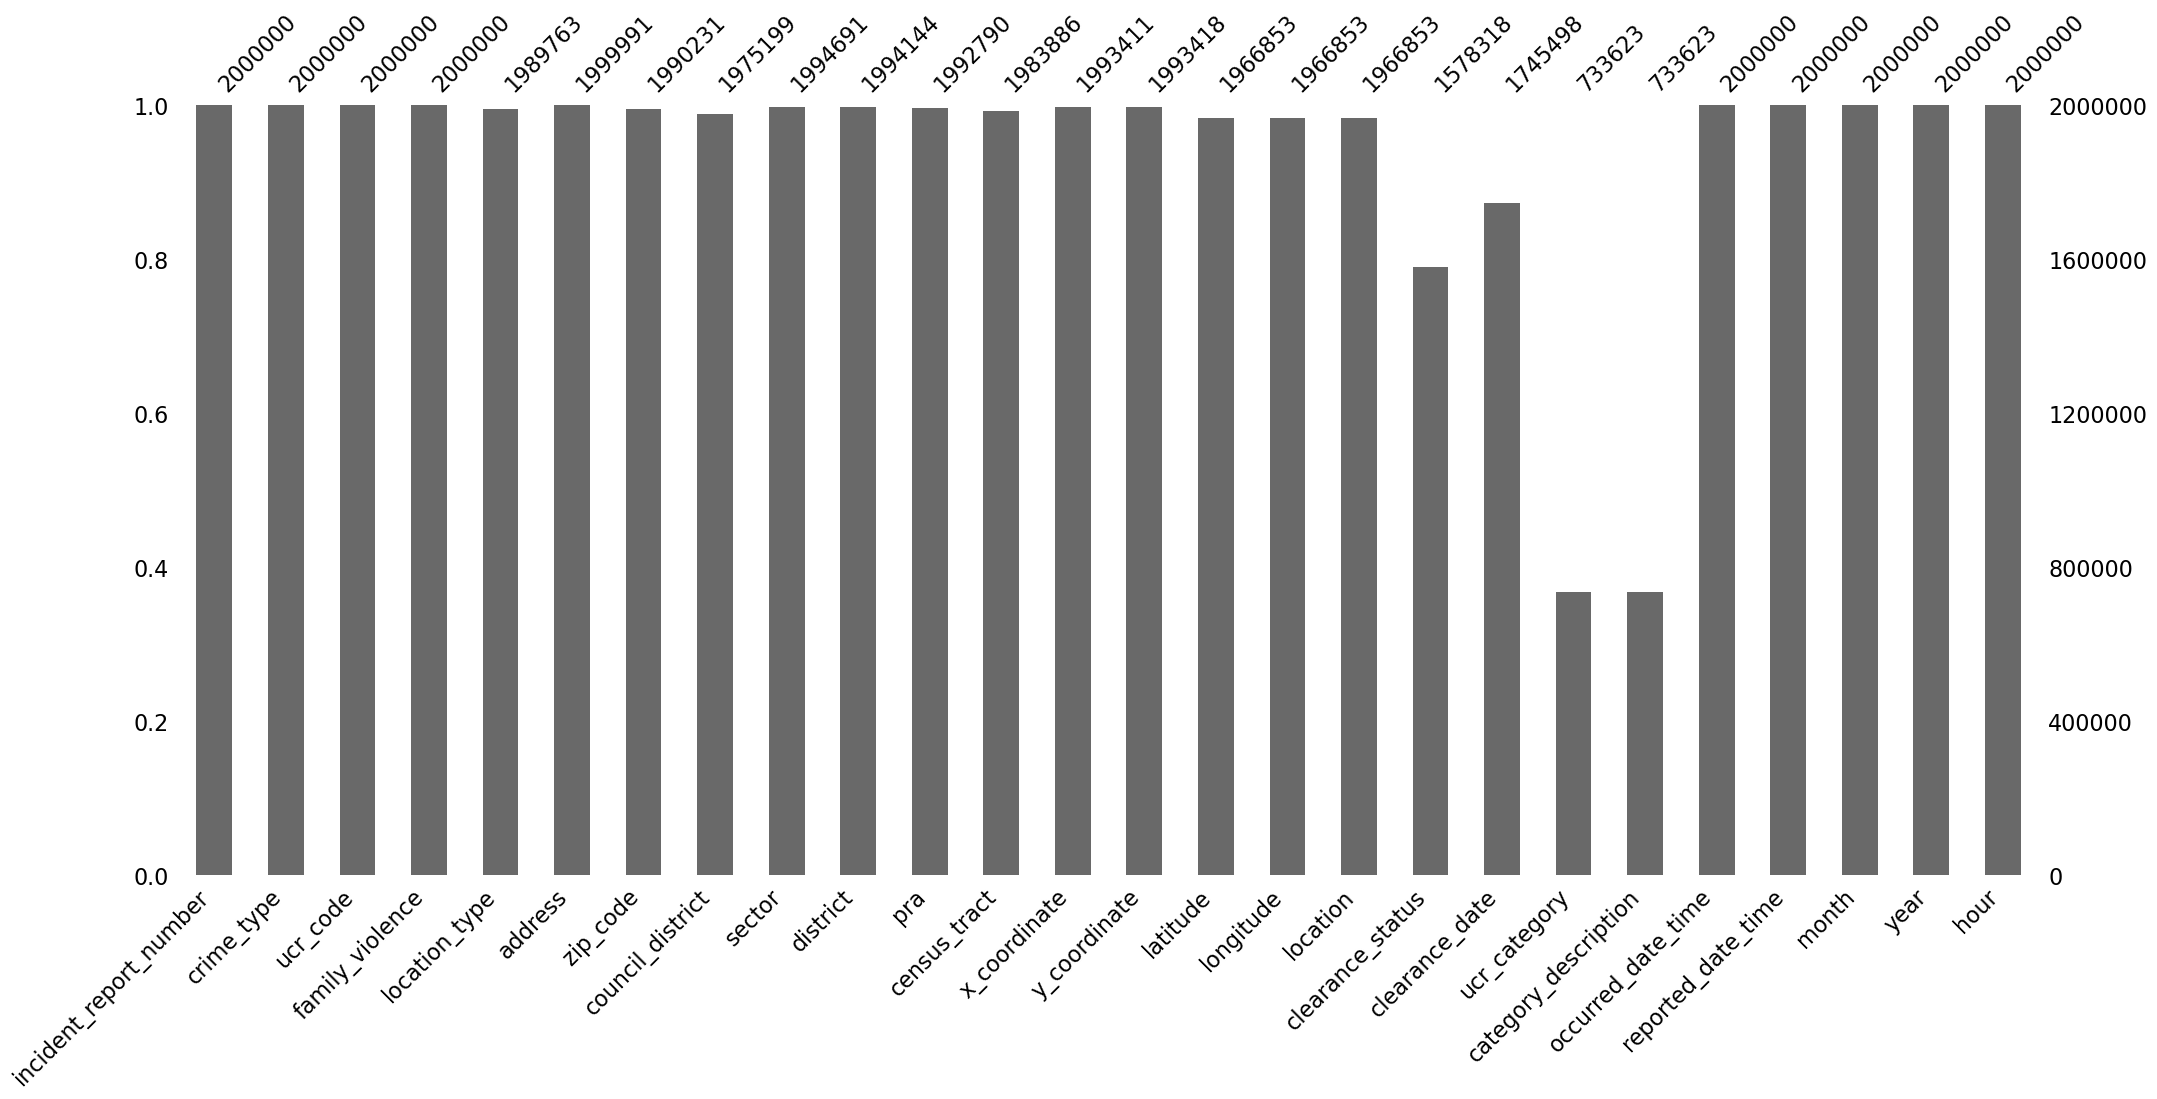

In [29]:
msno.bar(df_27_new)

In [30]:
missing = pd.concat([df_27_new.isnull().sum(), 100 * df_27_new.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values('count', ascending=False)

,count,%
category_description,1266377,63.31885
ucr_category,1266377,63.31885
clearance_status,421682,21.08410
clearance_date,254502,12.72510
location,33147,1.65735
longitude,33147,1.65735
latitude,33147,1.65735
council_district,24801,1.24005
census_tract,16114,0.80570
location_type,10237,0.51185


In [31]:
# since ucr_category and categry_description are missing almost 60% of values, I will drop those columns

drop_columns = ['ucr_category', 'category_description']
df_27_new.drop(drop_columns, axis=1, inplace=True)

In [32]:
df_27_new.columns

Index(['incident_report_number', 'crime_type', 'ucr_code', 'family_violence',
       'location_type', 'address', 'zip_code', 'council_district', 'sector',
       'district', 'pra', 'census_tract', 'x_coordinate', 'y_coordinate',
       'latitude', 'longitude', 'location', 'clearance_status',
       'clearance_date', 'occurred_date_time', 'reported_date_time', 'month',
       'year', 'hour'],
      dtype='object')

In [33]:
df_27_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000000 entries, 0 to 1999999
Data columns (total 24 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   incident_report_number  object        
 1   crime_type              object        
 2   ucr_code                object        
 3   family_violence         object        
 4   location_type           object        
 5   address                 object        
 6   zip_code                object        
 7   council_district        object        
 8   sector                  object        
 9   district                object        
 10  pra                     object        
 11  census_tract            object        
 12  x_coordinate            object        
 13  y_coordinate            object        
 14  latitude                object        
 15  longitude               object        
 16  location                object        
 17  clearance_status        object        
 18  cl

### Check for Duplicates<a id='check_duplicates'>

In [ ]:
def value_count(data):
    
    for col in data.columns:
        print(f"{col} value counts: {data[col].value_counts().head()}")
        print("########################################################")

In [37]:
df_27_new['incident_report_number'].value_counts().head()

2023491535     1
20102830373    1
20102830358    1
20102830360    1
20102830369    1
Name: incident_report_number, dtype: int64

In [40]:
df_27_new['crime_type'].value_counts().head()

BURGLARY OF VEHICLE               199432
THEFT                             190802
FAMILY DISTURBANCE                174466
CRIMINAL MISCHIEF                 112413
ASSAULT W/INJURY-FAM/DATE VIOL     70550
Name: crime_type, dtype: int64

In [39]:
len(df_27_new['crime_type'].value_counts())

421

In [41]:
len(df_27_new['ucr_code'].value_counts())

382

In [42]:
df_27_new['ucr_code'].value_counts().head()

601     207022
600     191337
3400    174466
900     115911
1400    113474
Name: ucr_code, dtype: int64

In [60]:
df_27_new.groupby(['longitude', 'latitude'])['crime_type'].value_counts().to_frame('count')

count
longitude    latitude    crime_type                           
-0.00013208  0.00011857  PROTECTIVE ORDER                    3
                         DAMAGE CITY VEHICLE                 1
                         FAMILY DISTURBANCE                  1
                         HARASSMENT                          1
                         THEFT CATALYTIC CONVERTER           1
...                                                        ...
-98.18497145 30.47476063 ASSAULT W/INJURY-FAM/DATE VIOL      1
-98.19028928 30.47748961 THEFT                               3
                         BURGLARY OF VEHICLE                 1
                         FAMILY DISTURBANCE                  1
-98.25452686 29.57279556 TERRORISTIC THREAT                  1

[812311 rows x 1 columns]

In [61]:
df_27_new.groupby(['longitude', 'latitude','hour'])['crime_type'].value_counts().to_frame('count')

count
longitude    latitude    hour crime_type                      
-0.00013208  0.00011857  8    PROTECTIVE ORDER               1
                         9    FAMILY DISTURBANCE             1
                         12   HARASSMENT                     1
                         14   THEFT CATALYTIC CONVERTER      1
                         15   DAMAGE CITY VEHICLE            1
...                                                        ...
-98.19028928 30.47748961 16   THEFT                          1
                         18   FAMILY DISTURBANCE             1
                              THEFT                          1
                         19   THEFT                          1
-98.25452686 29.57279556 10   TERRORISTIC THREAT             1

[1449299 rows x 1 columns]

###  Based on the above observations, I dont see any duplicate records. 

### starting EDA

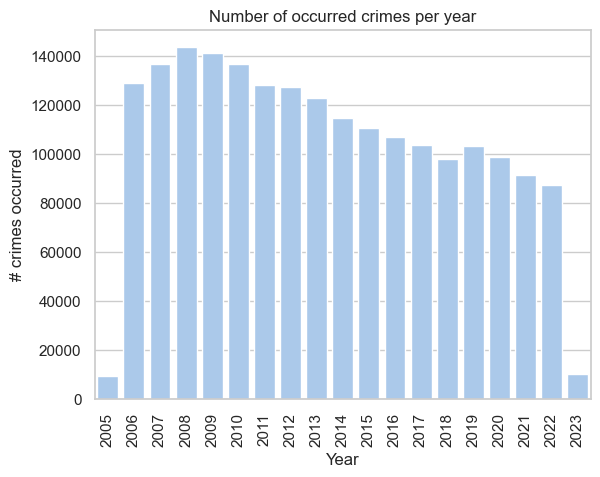

In [62]:
crimes_per_year = df_27_new['year'].value_counts().sort_index()

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
sns.set_color_codes("pastel")

g = sns.barplot(x=crimes_per_year.index, y=crimes_per_year.values,color='b')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set(xlabel='Year', ylabel='# crimes occurred')
plt.title('Number of occurred crimes per year')
plt.show()

Good to see the decline in the crime since 2008!

### Hourly crimes

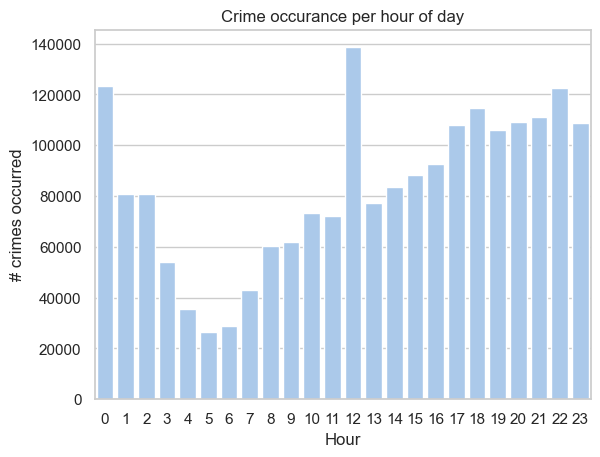

In [63]:
crimes_per_hour = df_27_new['hour'].value_counts().sort_index()
g = sns.barplot(x=crimes_per_hour.index, y=crimes_per_hour.values, color='b')
g.set(xlabel='Hour', ylabel='# crimes occurred')
plt.title('Crime occurance per hour of day')
plt.show()

Crimes happen maximum during noon time. 

### save the wrangled file<a id='save_file'>

In [65]:
#saving this file
table1 = pa.Table.from_pandas(df_27_new, preserve_index=True)
pq.write_table(table1, 'crime_reports_wrangled.parquet')

###  Summary of Data Wrangling<a id='summary'>

(a)  Ingested 2 million records into a Jupyter Notebook. 

(b) Following are the dimensions associated with the project:
'incident_report_number', 'crime_type', 'ucr_code', 'family_violence',
       'location_type', 'address', 'zip_code', 'council_district', 'sector',
       'district', 'pra', 'census_tract', 'x_coordinate', 'y_coordinate',
       'latitude', 'longitude', 'location', 'clearance_status',
       'clearance_date', 'ucr_category', 'category_description',
       'occurred_date_time', 'reported_date_time', 'hour','year','month'

(c) Determine the number of time series across each dimension, and
across all dimensions. ???

(d) Identify the target and its type (categorical/non-categorical). Possible targets could be crime_type, clearance_status

(e) Identify whether there are features in addition to time and the target.
These are sometimes called "Exogenous Variables".
Also determine the type of each feature, and whether they are
categorical or non-categorical.

If additional Exogenous Variables are not present, determine
if it makes senses to augment the dataset with them. ???

(f) Identify the resolution of TS (meaning: hourly, daily, weekly,
monthly, etc.) -  

(g) According to the business problem determine the type of
resolution to be used in the project, and what is called the
"forecasting horizon", which is the number of time units for
which the forecast will be computed. In our case, 
resolution will be hourly, the forecasting horizon will be for 24 hours.
In general, this depends on the needs of the client.

(h) As needed, perform appropriate aggregations according to (g).

(i) Decide whether you want to store the "wrangled" dataset using
a different format. I used parquet format to save the data frame as the data types wil not get messed up

